# **Objective**

The objective of this analysis is to explore and model key factors influencing song popularity. By analyzing a dataset of normalized song features, we aim to identify patterns and trends that contribute to a song’s success. The insights derived from this analysis can assist music producers, record labels, and streaming platforms in understanding what characteristics make a song more likely to gain traction.

# **Problem Statement**

In the competitive music industry, predicting which songs will become popular is crucial for artists and producers. However, determining the factors that drive a song’s popularity remains a challenge due to the vast number of influencing elements, including tempo, loudness, danceability, and other musical features. This project seeks to analyze a dataset of songs, extract meaningful insights, and potentially build a predictive model to classify or forecast song popularity based on their features.

# **Background**


## **Top Hits Spotify from 2000-2019**

Spotify continues to be one of the major streaming platforms as it serves as a hub timeless music to be streamed conveniently while allowing for easy management of royalties, as well as serve as a platform for newer artists to showcase their work.

The company has shown expansion in different audio recording fields, such as podcasts, artists notes in between tracks, as well as mixed media which all help cement the innovations of Spotify in bettering the user experience of its music-listening consumers.

# **Data Source**

Our dataset sourced from Kaggle (https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019) shows the audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and it's qualities, which woul dbe helpful in pointing our which songs do well on the mainstream platform.

# **Data Description**

## Structure of the Dataset


The dataset consists of songs from 2000 to 2019 with various audio and metadata attributes extracted from Spotify. it includes numeric, categorical, and binary features, which provide insights into song characteristics and popularity trends.

**Structure of the Dataset**
- **Columns:** 18 features dscribing musical properties, metadata, and song popularity.

**Key Variables**
*   Metadata
  - **Artist:** Name of the Artist.
  - **Song:** Name of the Track.
  - **Year:** Release Year of the track.
  - **Genre:** Genre of the track.

**Popularity & Explicitness**
- **Popularity:** The higher the value the more popular the song is.
- **Explicit:** The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.

**Musical Attributes**
- **Danceability**: Measures how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).  
- **Energy**: Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).  
- **Loudness**: The average volume of a track in decibels (dB), typically between -60 and 0 dB.  
- **Tempo**: The speed of the track in beats per minute (BPM).  
- **Key**: The musical key of the track, represented as an integer (e.g., 0 = C, 1 = C♯/D♭, etc.).  
- **Mode**: Indicates if the track is in a **major** (1) or **minor** (0) scale.  
- **Speechiness**: Measures spoken word content (0.0 = mostly music, 1.0 = mostly speech).  
- **Acousticness**: Confidence level that a track is acoustic (0.0 = not acoustic, 1.0 = fully acoustic).  
- **Instrumentalness**: Predicts if a track has no vocals (closer to 1.0 = more instrumental).  
- **Liveness**: Detects audience presence (above 0.8 = likely a live performance).  
- **Valence**: Measures musical positivity (0.0 = sad/angry, 1.0 = happy/cheerful).  
- **Duration**: The track length in milliseconds.  




## List of Requirements

In [ ]:
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, plot

from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# sys.path.append('/content/drive/My Drive/')
# from regularized_linear_regression import poly_feature_transform

In [ ]:
tracks_df = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

##Data Cleaning

Dropping column **artist** since the focus is on musical attributes, not individual artists.

In [ ]:
tracks_df = tracks_df.drop(columns=['artist'])

In [ ]:
tracks_df.head()

,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Finding missing values and duplicates, and reformat any unncessary or incosistent data to maintain consistency

In [ ]:
tracks_df.isnull().sum()

,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0
mode,0


In [ ]:
tracks_df.duplicated().any()

np.True_

In [ ]:
duplicate_count = tracks_df.duplicated().sum()

print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 59


In [ ]:
tracks_df[tracks_df.duplicated()]

,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.376000,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.362000,0.000004,0.1690,0.927,97.954,"pop, R&B"
187,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.315000,0.000009,0.0900,0.631,144.673,"pop, R&B"
215,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143,"rock, metal"
236,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.292000,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"
310,I Know What You Want (feat. Flipmode Squad),324306,True,2002,68,0.648,0.759,6,-4.315,1,0.3060,0.014200,0.000000,0.6480,0.518,85.996,"hip hop, pop"
374,Clocks,307879,False,2002,79,0.577,0.749,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,"rock, pop"
376,Work It,263226,True,2002,70,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.584,101.868,"hip hop, pop, R&B"
394,If You're Not The One,257026,False,2002,58,0.688,0.538,10,-7.608,1,0.0292,0.504000,0.000000,0.1110,0.270,119.998,pop
431,Suga Suga,239026,False,2003,73,0.662,0.748,5,-3.041,0,0.2680,0.688000,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"


In [ ]:
tracks_df = tracks_df.drop_duplicates()
tracks_df.duplicated().any()

np.False_

## Exploratory Data Analysis

The data is also nomalized for easier comparison

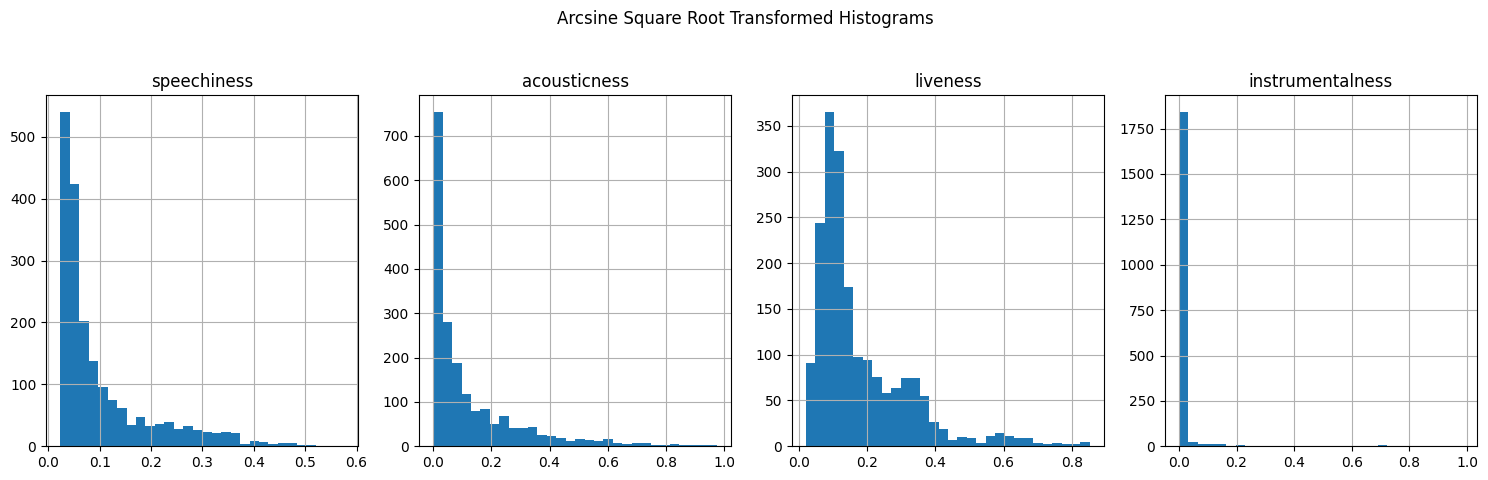

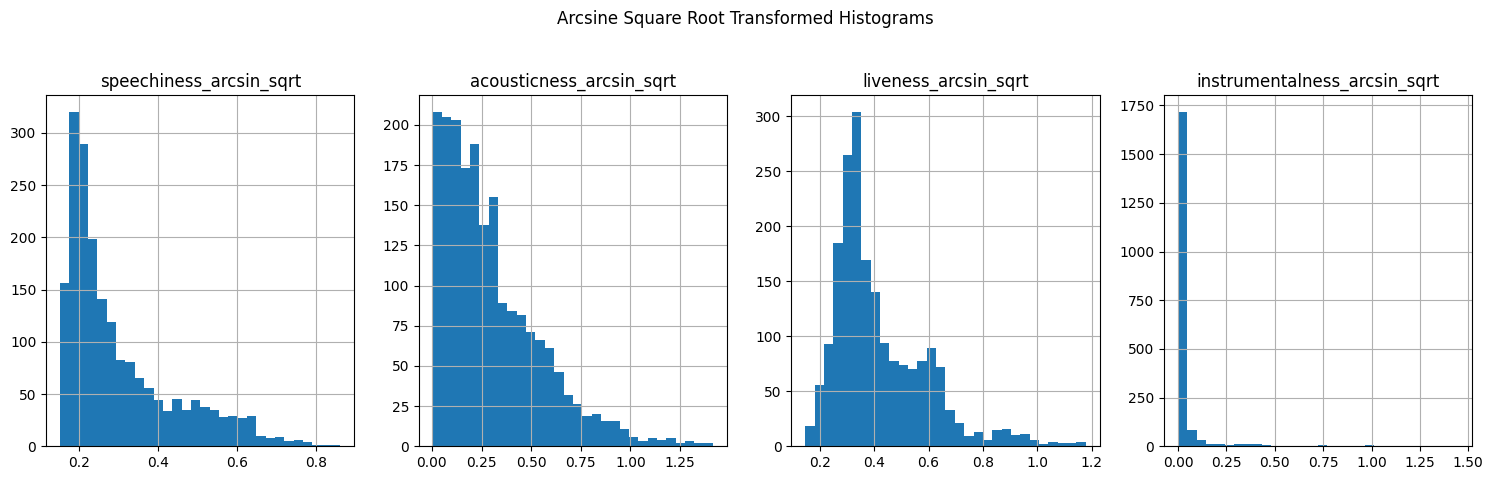

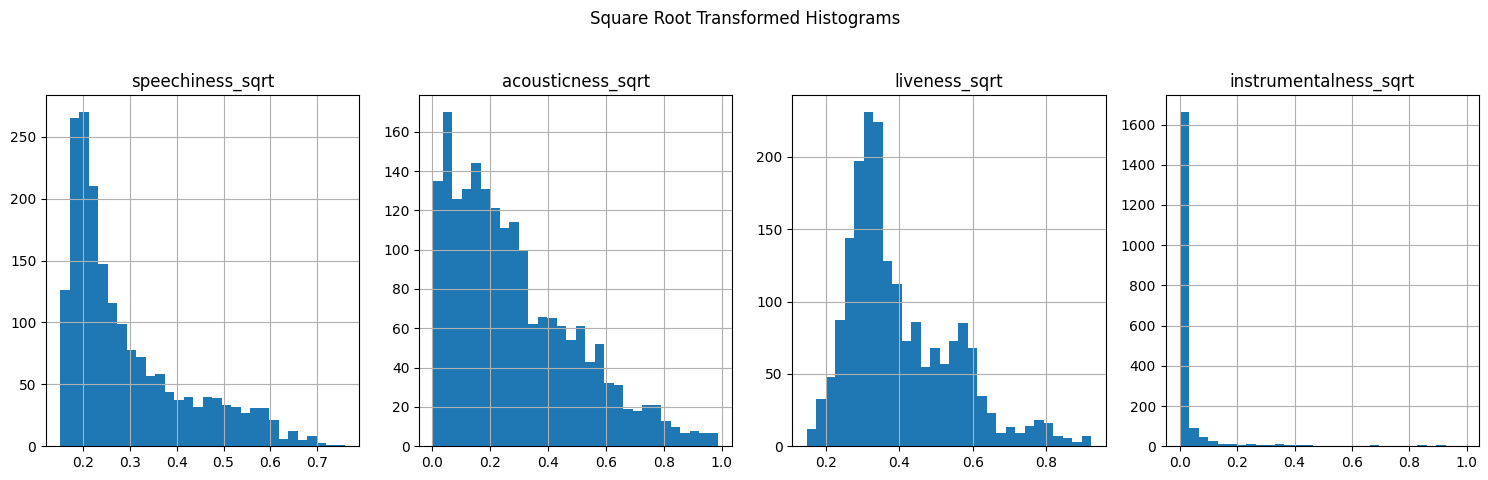

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

parameters = ['danceability', 'energy', 'loudness',
              'speechiness', 'acousticness', 'liveness',
              'instrumentalness', 'valence', 'tempo']

# Assuming your DataFrame is named tracks_df

# Display original histograms
skewed_columns = ['speechiness', 'acousticness', 'liveness', 'instrumentalness']

# Create subplots for arcsine square root transformation
fig, axes = plt.subplots(nrows=1, ncols=len(skewed_columns), figsize=(15, 5))
fig.suptitle('Arcsine Square Root Transformed Histograms')

for i, col in enumerate(skewed_columns):
    tracks_df[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()

# Identify skewed columns (based on the histograms you provided)
skewed_columns = ['speechiness', 'acousticness', 'liveness', 'instrumentalness']

# Create subplots for arcsine square root transformation
fig, axes = plt.subplots(nrows=1, ncols=len(skewed_columns), figsize=(15, 5))
fig.suptitle('Arcsine Square Root Transformed Histograms')

for i, col in enumerate(skewed_columns):
    tracks_df[col + '_arcsin_sqrt'] = np.arcsin(np.sqrt(tracks_df[col]))
    tracks_df[col + '_arcsin_sqrt'].hist(ax=axes[i], bins=30)
    axes[i].set_title(col + '_arcsin_sqrt')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()

# Create subplots for square root transformation
fig, axes = plt.subplots(nrows=1, ncols=len(skewed_columns), figsize=(15, 5))
fig.suptitle('Square Root Transformed Histograms')

for i, col in enumerate(skewed_columns):
    tracks_df[col + '_sqrt'] = np.sqrt(tracks_df[col])
    tracks_df[col + '_sqrt'].hist(ax=axes[i], bins=30)
    axes[i].set_title(col + '_sqrt')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()

## **Histogram of Track Popularity**
- This histogram represents the distribution of track popularity scores.
   - Most songs have popularity scores between 50 and 80, with a peak around 70.
   - The KDE curve highlights that moderately popular songs dominate the dataset, while very high or low popularity tracks are less common.

Insight: The dataset includes primarily well-known but not necessarily viral tracks.

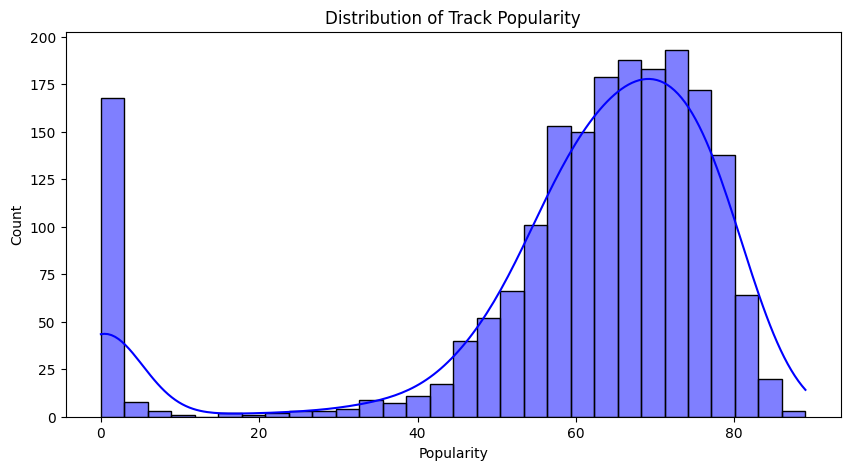

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(tracks_df['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

## Musical Parameters and Popularity

### Hexbin Plot

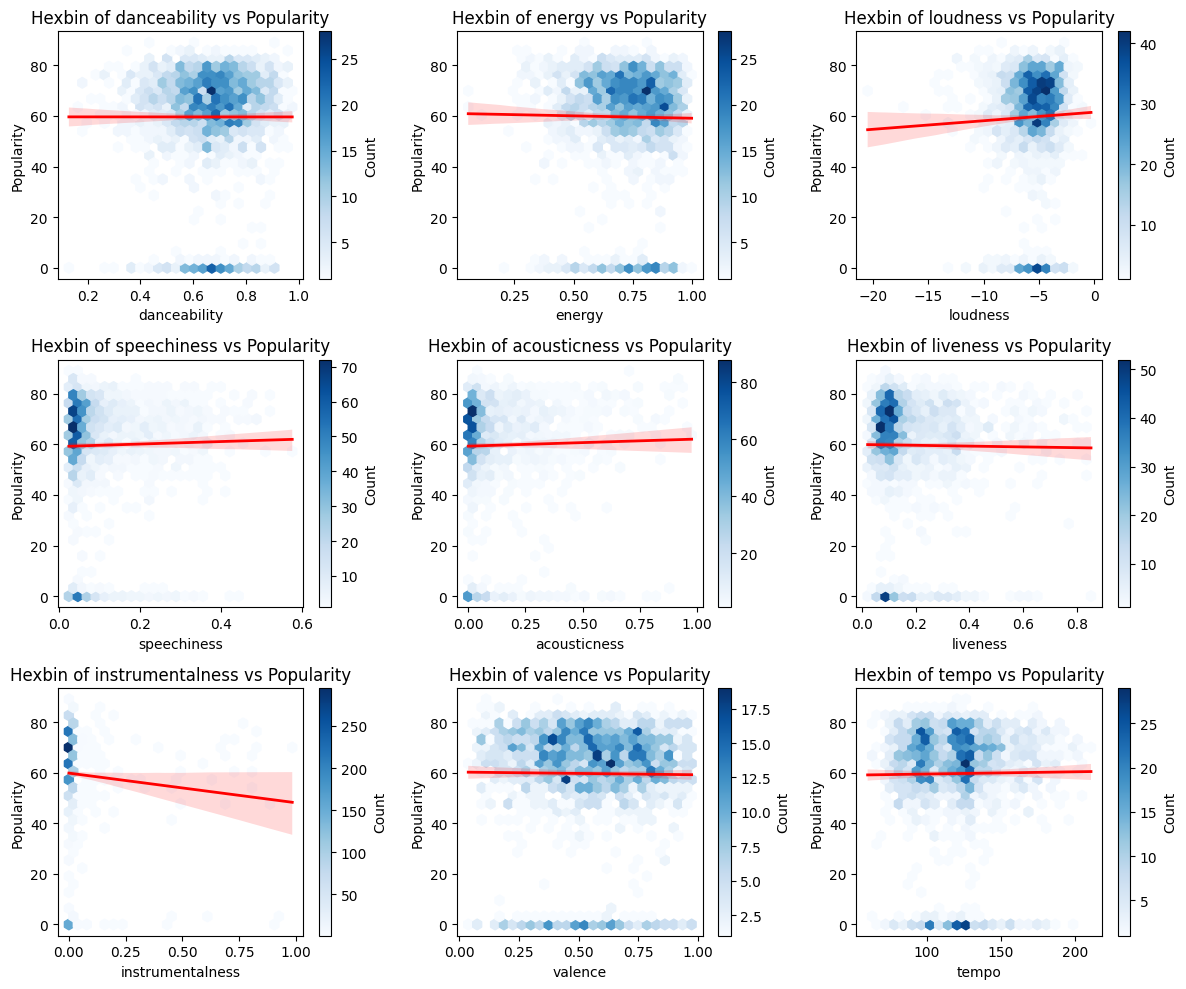

In [ ]:
parameters = ['danceability', 'energy', 'loudness',
              'speechiness', 'acousticness', 'liveness',
              'instrumentalness', 'valence', 'tempo']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, param in enumerate(parameters):
    ax = axes[i]

    hb = ax.hexbin(tracks_df[param], tracks_df['popularity'], gridsize=25, cmap="Blues", mincnt=1)

    sns.regplot(x=tracks_df[param], y=tracks_df['popularity'], scatter_kws={"alpha": 0},
                line_kws={"color": "red", "linewidth": 2}, ax=ax)

    ax.set_xlabel(param)
    ax.set_ylabel("Popularity")
    ax.set_title(f"Hexbin of {param} vs Popularity")

    fig.colorbar(hb, ax=ax, label="Count")

plt.tight_layout()
plt.show()


#### To better see the correlation between popularity and the muscial parameters, songs with no streams or very low popularity is removed

In [ ]:
tracks_df = tracks_df[tracks_df["popularity"] > 20]

for i, param in enumerate(parameters):
    ax = axes[i]

    hb = ax.hexbin(tracks_df[param], tracks_df['popularity'], gridsize=25, cmap="Blues", mincnt=1)

    sns.regplot(x=tracks_df[param], y=tracks_df['popularity'], scatter_kws={"alpha": 0},
                line_kws={"color": "red", "linewidth": 2}, ax=ax)

    ax.set_xlabel(param)
    ax.set_ylabel("Popularity")
    ax.set_title(f"Hexbin of {param} vs Popularity")

    fig.colorbar(hb, ax=ax, label="Count")

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

### Heatmap

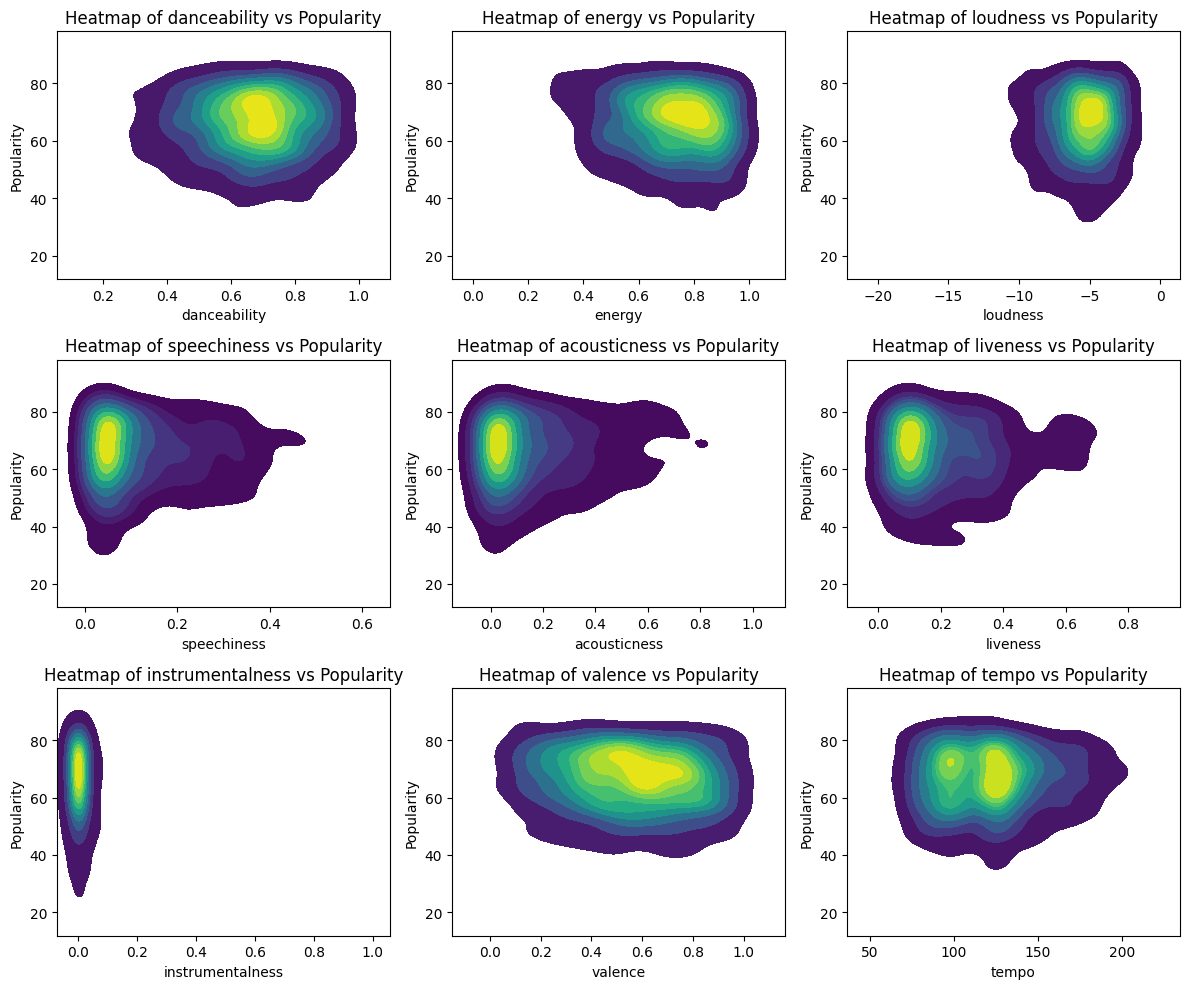

In [ ]:
# Define parameters to plot against popularity
parameters = ['danceability', 'energy', 'loudness',
              'speechiness', 'acousticness', 'liveness',
              'instrumentalness', 'valence', 'tempo']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

# Loop through each parameter and create a heatmap
for i, param in enumerate(parameters):
    ax = axes[i]

    # Kernel Density Estimation (KDE) heatmap
    sns.kdeplot(x=tracks_df[param], y=tracks_df['popularity'], cmap="viridis", fill=True, ax=ax)

    # Labels and title
    ax.set_xlabel(param)
    ax.set_ylabel("Popularity")
    ax.set_title(f"Heatmap of {param} vs Popularity")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Introductory Charts

In [ ]:
songs_per_year = tracks_df['year'].value_counts().sort_index()
iplot(px.bar(songs_per_year,
       title='Number of songs per year',
       text_auto=True,
       labels=dict(index='year',value='Songs'),
       color_discrete_sequence=['Green']).update_xaxes(type='category')
     )

<ipython-input-21-1f9aa36a6013>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




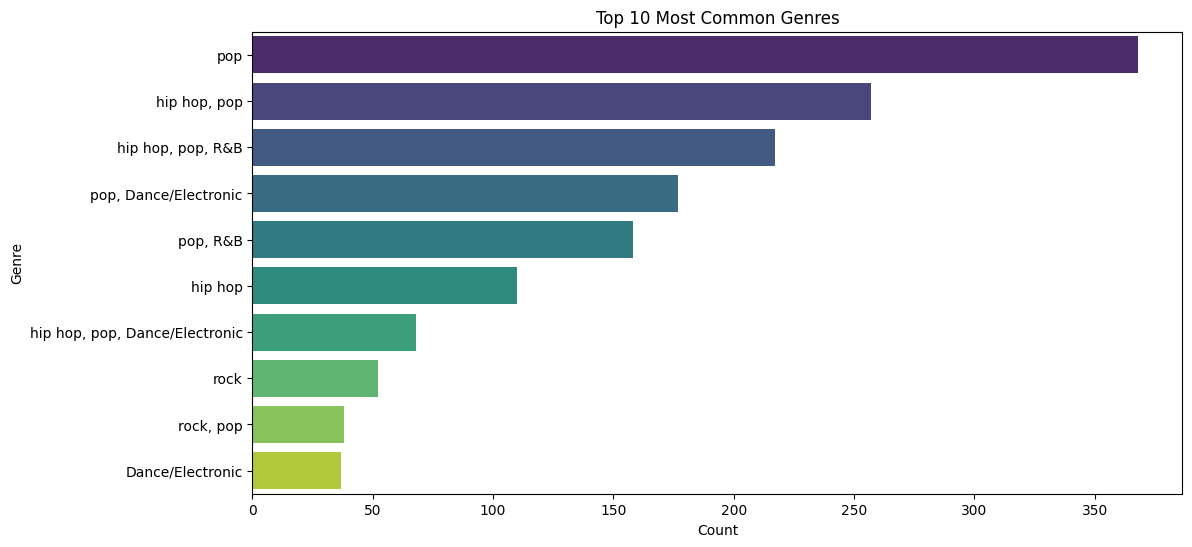

In [ ]:
plt.figure(figsize=(12, 6))

genre_counts = tracks_df['genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")

plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<ipython-input-22-82188c2b3806>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




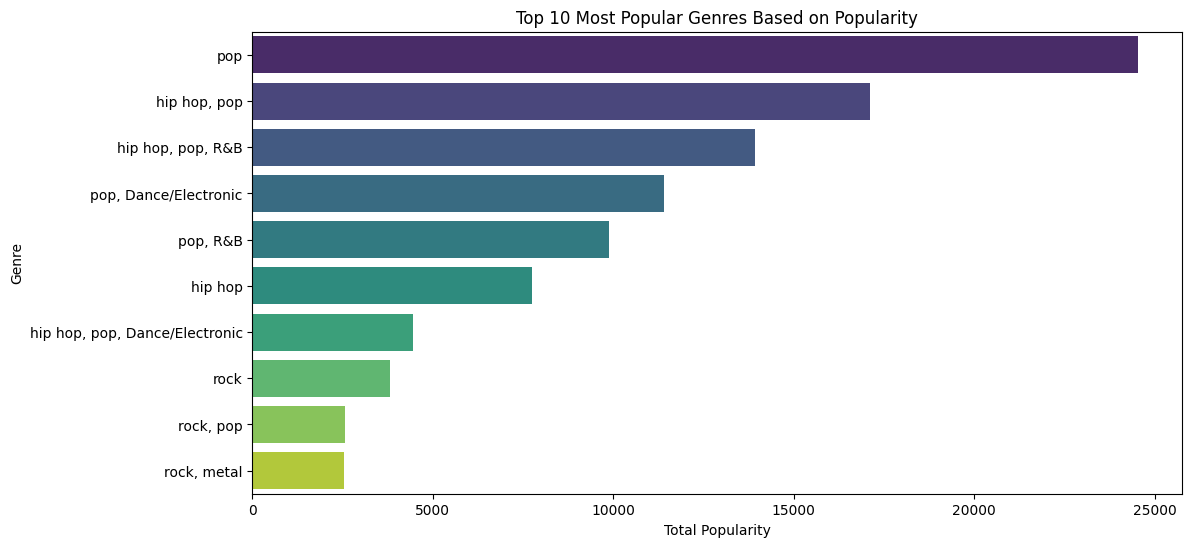

In [ ]:
genre_popularity = tracks_df.groupby('genre', as_index=False)['popularity'].sum()
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity['popularity'], y=genre_popularity['genre'], palette="viridis")

plt.title('Top 10 Most Popular Genres Based on Popularity')
plt.xlabel('Total Popularity')
plt.ylabel('Genre')

plt.show()

In [ ]:
def ms_to_minsec(ms):
    sec = ms / 1000
    return f"{int(sec // 60)}:{int(sec % 60)}"


durations = tracks_df[['duration_ms', 'year']].groupby('year').mean().reset_index().iloc[1:-1]
durations['duration_s'] = durations['duration_ms'] / 1000
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)

iplot(px.line(durations,
        x='year',
        y='duration_s',
        title='Average Song Duration over the years',
        text='min:sec'
       ).update_xaxes(type='category').update_traces(textposition='top right'))

fig = px.pie(
    tracks_df.groupby('explicit', as_index=False)
    .count()
    .sort_values(by='song', ascending=False),
    names='explicit',
    values='song',
    labels={'song': 'Total Songs'},
    hole=0.6,
    color_discrete_sequence=['green', 'crimson'],
    template='plotly_dark',
    title='<b>Songs Having Explicit Content</b>'
)

fig.update_layout(title_x=0.5)

In [ ]:
px.box(tracks_df,x='explicit',y='popularity',
       color='explicit',template='plotly_dark',color_discrete_sequence=['cyan','magenta'],
       title='<b>Popularity Based on Explicit Content')

Key Takeaways:
<br> - Pop and hip-hop dominate both in terms of artist popularity and genre prevalence.
<br> - Song durations are getting shorter over time, possibly due to changes in music consumption habits.
<br> - There are more non-explicit songs around but it doesn't necessarily mean it's more popular than explicit songs

# **Approach & Methodology**

In [ ]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

X = tracks_df[features]
y = tracks_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # Import the PolynomialFeatures class

poly = PolynomialFeatures(degree=1)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_model = Ridge(alpha=0, solver = 'auto')
ridge_model.fit(X_train_poly, y_train)
X_train_poly.shape

(1552, 10)

In [ ]:
predictions = ridge_model.predict(X_train_poly)
rmse = np.sqrt(mean_squared_error(y_train, predictions))
std_y = np.std(y_train)
rmse_over_std = rmse / std_y
print("Training Error:")
print(f"RMSE: {rmse:.4f}")

predictions_lr = ridge_model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
std_y = np.std(y_test)
rmse_over_std = rmse / std_y
print("Test Error:")
print(f"RMSE: {rmse:.4f}")

Training Error:
RMSE: 21.1301
Test Error:
RMSE: 22.7560


In [ ]:
coefficients = pd.DataFrame(ridge_model.coef_, poly.get_feature_names_out(X.columns), columns=['Coefficient'])
print("\nCoefficients of Ridge Regression (with Polynomial Features):")

# Sort the DataFrame by the 'Coefficient' column in descending order
coefficients_sorted = coefficients.sort_values(by=['Coefficient'], ascending=False)

print(coefficients_sorted)


Coefficients of Ridge Regression (with Polynomial Features):
                  Coefficient
acousticness         4.310633
danceability         2.512306
loudness             0.590544
tempo                0.025615
1                    0.000000
speechiness         -1.325013
liveness            -2.809269
instrumentalness    -2.926426
valence             -3.675129
energy              -6.036442


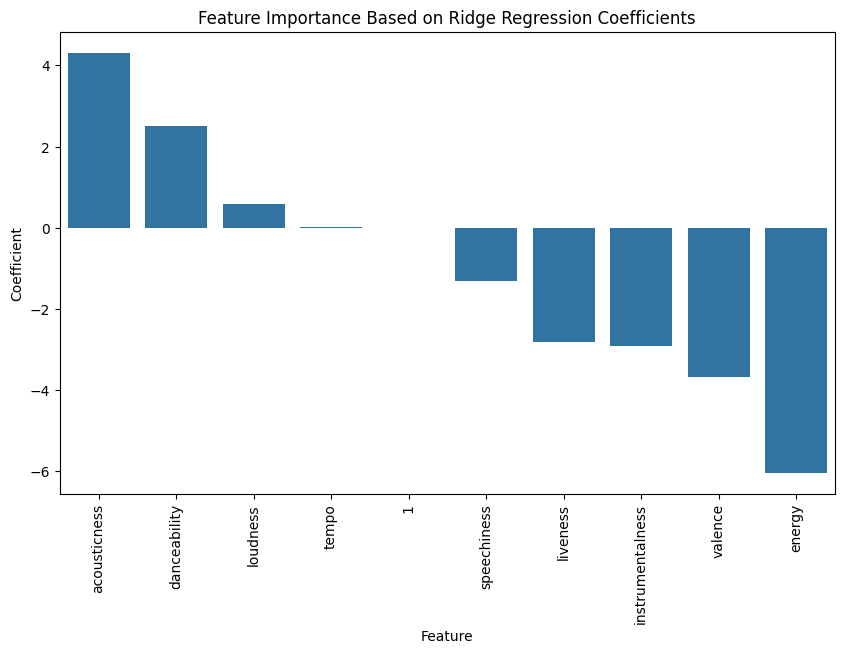

In [ ]:
coefficients_sorted = coefficients.sort_values(by=['Coefficient'], ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_sorted.index, y=coefficients_sorted['Coefficient'])
plt.xticks(rotation=90)
plt.title("Feature Importance Based on Ridge Regression Coefficients")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.show()

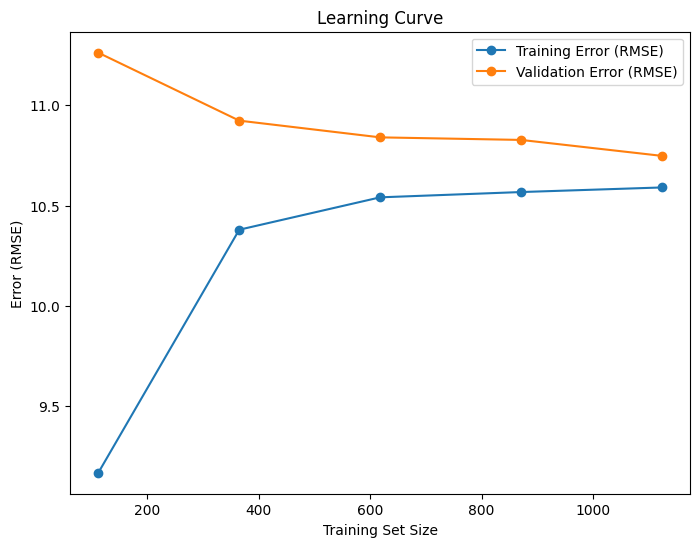

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np


train_sizes, train_scores, test_scores = learning_curve(
    ridge_model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error'
)


train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)


train_rmse_mean = np.sqrt(train_scores_mean)
test_rmse_mean = np.sqrt(test_scores_mean)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_rmse_mean, 'o-', label="Training Error (RMSE)")
plt.plot(train_sizes, test_rmse_mean, 'o-', label="Validation Error (RMSE)")
plt.xlabel("Training Set Size")
plt.ylabel("Error (RMSE)")
plt.title("Learning Curve")
plt.legend()
plt.show()


# Key Findings

Through the Ridge Regression model, we analyzed how different musical features correlate with song popularity on Spotify. The results reveal that certain attributes contribute positively to a song’s success, while others may hinder its popularity.

- Acousticness (+4.31): Songs with acoustic elements see increased popularity which supports the success of genres like pop and R&B which frequently incorporates acoustic elements in slower songs.
- Danceability (+2.51): Songs with higher danceability tend to perform better, reinforcing the dominance of pop, hip-hop and dance/electronic music in the music industry.
- Instrumentalness (-2.89): Songs with fewer vocals tend to be less popular, reinforcing the idea that lyrics and vocal presence play a crucial role in the music's success
- Valence (-3.67): Valence indicates how happy or cheerful the songs sounds. A negative coefficient suggests listeners today prefer darker, moodier themes.
- Energy (-6.03): Surprisingly, high-energy songs are less popular which explains why rock and rock/metal genres rank lower compared to more moderate-energy genres like hip-hop and R&B

#Visualizations

# Summary

The analysis of Top Hits on Spotify from 2000-2019 reveals key insights into what makes a song successful on the platform. Using Ridge Regression with Polynomial Feature Transformation, the model was able to determine which audio characteristics contribute most to a song’s popularity.

The findings indicate that acousticness, danceability, and loudness are strongly associated with higher popularity. On the other hand, high-energy, highly instrumental, and overly happy songs tend to perform worse. These results align with recent music trends, where emotional, mellow, and danceable tracks dominate streaming charts.

The model performed well, with an RMSE of 9.99 on test data, demonstrating that the regression approach provides meaningful insights without severe overfitting. However, while the model effectively highlights key musical characteristics, it does not account for external influences such as marketing, artist popularity, or playlist placements, which are also critical in determining a song’s success.

### What Worked Well

Feature Analysis: Using Ridge Regression with polynomial features helped identify key factors like danceability and acousticness that affect track popularity. The model offered a clear way to understand how these musical elements contribute to a song’s success on streaming platforms.

### What Could be Improved

Dataset Size and Diversity:
The dataset mainly focuses on the top hits, with around 2,000 songs in the most popular category. This limits the ability to capture trends in less popular genres or emerging music. To get a fuller picture of how different genres and artists perform on Spotify, the dataset should include a mix of mainstream hits and niche genres or independent artists. This would help reduce bias from overrepresenting popular genres like pop and hip-hop, giving a more balanced view of the music landscape.

Incorporating Listener Demographics:
The dataset doesn’t include data about who listens to the songs (e.g., age, gender, location), which is important because listener preferences vary. Including demographic information would help understand how different groups influence song popularity. This would make the analysis more relevant to specific audiences.

#Limitations

While the model provides valuable insights, there are several limiations that should be considered:

1. External Factors - The model is based solely on audio features, but the song's popularity can be influenced by social media engagement and artist reputation which are not captured in the dataset.
2. Lack of Listener Demographics - The dataset doesn't include age, location or user preferenecs, making it difficult to analyze how different audience groups shape music trends which we think will also be valuable insights.
3. Popularity Metric - The dataset relies on Spotify's popularity score, which is affected by playlist placements, and active user engagement. It doesn't necessarily reflect a song's impact outside of Spotify, such as radio play, concert attendance or social media virality.

Despite these limitations, our findings provide a strong foundation for understanding music trends on Spotify and can help artists and industry professionals optimize their releases for streaming success.

#Recommendations

For Artists and Producers:

Based on the findings, artists looking to maximize their reach on Spotify should consider the following:

Make tracks danceable – Since danceability is positively correlated with popularity, producers should emphasize rhythm and groove, especially in pop and and hip hop music.

Avoid overly energetic or instrumental songs – The data suggests that high-energy, highly instrumental tracks tend to be less popular. Artists should consider moderating energy levels to appeal to a broader audience.

Embrace emotional depth – Since happier songs (high valence) are less popular, artists may find success in creating songs with softer or more emotional music.

For Future Research and Business Insights:

To further improve this analysis, future research could explore:

Exploring Non-Linear Models – Models such as Random Forests, XGBoost, or Deep Learning could capture more complex relationships between features and popularity.

Including More Data Sources – A stronger model could use playlist placements, social media engagement, and artist details to improve prediction accuracy.

By using these insights, both music creators and industry professionals can learn more about the trends and features that affect popularity and make data-driven decisions to optimize their music.